Install the packages.
```
!pip install torch torchvision transformers textwrap numpy pandas tqdm opencv-python
```

To mount Google Drive in Google Colab, please execute the code below.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os

# change to root directory
root_dir = os.getcwd()

# create a working folder
working_dir = os.path.join(os.getcwd(), 'drive', 'MyDrive', 'woa7015-med-vqa')
if not os.path.exists(working_dir):
    os.makedirs(working_dir)

if os.getcwd() != working_dir:
    os.chdir(working_dir)

assert os.getcwd() == working_dir
print(f"Current directory: {os.getcwd()}")

Current directory: /content/drive/MyDrive/woa7015-med-vqa


Load the `SLAKE`

In [3]:
import pandas as pd

data_dir = os.path.join(working_dir, 'Slake1.0')
train_df = pd.read_json(os.path.join(data_dir, 'train.json'))
validate_df = pd.read_json(os.path.join(data_dir, 'validate.json'))
test_df = pd.read_json(os.path.join(data_dir, 'test.json'))

print("train:", train_df.shape)
print("validate:", validate_df.shape)
print("test:", test_df.shape)

train: (9835, 12)
validate: (2099, 12)
test: (2094, 12)


Filter the records that have Chinese questions.

In [4]:
train_df = train_df[train_df['q_lang'] == 'en'].reset_index(drop=True)
validate_df = validate_df[validate_df['q_lang'] == 'en'].reset_index(drop=True)
test_df = test_df[test_df['q_lang'] == 'en'].reset_index(drop=True)

print("train:", train_df.shape)
print("validate:", validate_df.shape)
print("test:", test_df.shape)

train: (4919, 12)
validate: (1053, 12)
test: (1061, 12)


A glance of the dataset.

In [5]:
sample_df = train_df.sample(5)
sample_df

,img_id,img_name,question,answer,q_lang,location,modality,answer_type,base_type,content_type,triple,qid
1197,246,xmlab246/source.jpg,Does the picture contain liver?,Yes,en,Chest_heart,CT,CLOSED,vqa,Organ,"[vhead, _, _]",1197
373,16,xmlab16/source.jpg,What modality is used to take this image?,MRI,en,Abdomen,MRI,OPEN,vqa,Modality,"[vhead, _, _]",373
3101,417,xmlab417/source.jpg,Which part of the body does this image belong to?,Head,en,Brain_Face,CT,OPEN,vqa,Position,"[vhead, _, _]",3101
3214,432,xmlab432/source.jpg,Does the picture contain the organ which has t...,No,en,Neck,CT,CLOSED,kvqa,KG,"[vhead, effect, detoxicate]",3214
1003,227,xmlab227/source.jpg,Which part of the body does this image belong to?,Abdomen,en,Abdomen,CT,OPEN,vqa,Position,"[vhead, _, _]",1003


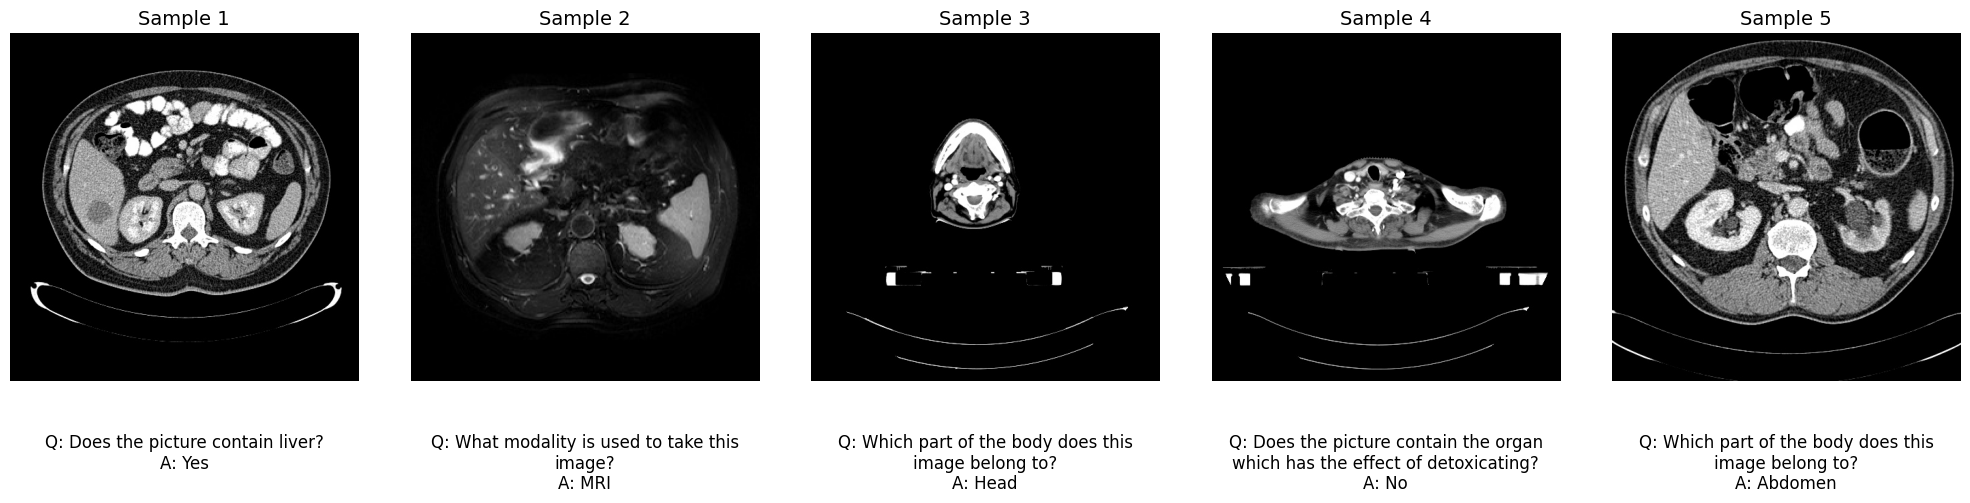

In [6]:
from utils import show_samples

show_samples(sample_df, img_dir=os.path.join(data_dir, 'imgs'))

Train the VQA model

In [7]:
from utils import train_model

dataset_dir = os.path.join(working_dir, 'Slake1.0')
model, train_losses, val_losses, train_accs, val_accs = train_model(dataset_dir, train_df, validate_df)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_We

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


100%|██████████| 548M/548M [00:03<00:00, 176MB/s]
Processing epoch 01: 100%|██████████| 154/154 [03:29<00:00,  1.36s/it, acc=0.130, loss=4.243]



Epoch [1/25]
Train Loss: 4.1773, Train Acc: 16.89%
Val Loss: 3.9143, Val Acc: 17.28%
------------------------------------------------------------
Model saved!


Processing epoch 02: 100%|██████████| 154/154 [01:41<00:00,  1.51it/s, acc=0.304, loss=3.957]



Epoch [2/25]
Train Loss: 3.6203, Train Acc: 21.98%
Val Loss: 3.2203, Val Acc: 30.77%
------------------------------------------------------------
Model saved!


Processing epoch 03: 100%|██████████| 154/154 [01:42<00:00,  1.50it/s, acc=0.478, loss=2.787]



Epoch [3/25]
Train Loss: 2.8443, Train Acc: 36.25%
Val Loss: 2.4678, Val Acc: 44.82%
------------------------------------------------------------
Model saved!


Processing epoch 04: 100%|██████████| 154/154 [01:40<00:00,  1.53it/s, acc=0.565, loss=1.989]



Epoch [4/25]
Train Loss: 2.3418, Train Acc: 47.67%
Val Loss: 2.1537, Val Acc: 47.58%
------------------------------------------------------------
Model saved!


Processing epoch 05: 100%|██████████| 154/154 [01:41<00:00,  1.51it/s, acc=0.652, loss=1.736]



Epoch [5/25]
Train Loss: 2.1058, Train Acc: 53.47%
Val Loss: 2.0238, Val Acc: 53.47%
------------------------------------------------------------
Model saved!


Processing epoch 06: 100%|██████████| 154/154 [01:41<00:00,  1.51it/s, acc=0.652, loss=1.696]



Epoch [6/25]
Train Loss: 2.0206, Train Acc: 55.48%
Val Loss: 1.9146, Val Acc: 57.17%
------------------------------------------------------------
Model saved!


Processing epoch 07: 100%|██████████| 154/154 [01:39<00:00,  1.54it/s, acc=0.522, loss=1.839]



Epoch [7/25]
Train Loss: 1.9327, Train Acc: 57.92%
Val Loss: 1.8965, Val Acc: 58.97%
------------------------------------------------------------
Model saved!


Processing epoch 08: 100%|██████████| 154/154 [01:41<00:00,  1.52it/s, acc=0.609, loss=1.796]



Epoch [8/25]
Train Loss: 1.8844, Train Acc: 58.77%
Val Loss: 1.8310, Val Acc: 59.92%
------------------------------------------------------------
Model saved!


Processing epoch 09: 100%|██████████| 154/154 [01:40<00:00,  1.53it/s, acc=0.565, loss=1.821]



Epoch [9/25]
Train Loss: 1.8397, Train Acc: 60.24%
Val Loss: 1.7757, Val Acc: 62.20%
------------------------------------------------------------
Model saved!


Processing epoch 10: 100%|██████████| 154/154 [01:42<00:00,  1.51it/s, acc=0.609, loss=2.015]



Epoch [10/25]
Train Loss: 1.8169, Train Acc: 61.23%
Val Loss: 1.7769, Val Acc: 60.78%
------------------------------------------------------------
Model saved!


Processing epoch 11: 100%|██████████| 154/154 [01:40<00:00,  1.53it/s, acc=0.826, loss=1.355]



Epoch [11/25]
Train Loss: 1.7803, Train Acc: 61.70%
Val Loss: 1.7322, Val Acc: 62.96%
------------------------------------------------------------
Model saved!


Processing epoch 12: 100%|██████████| 154/154 [01:40<00:00,  1.53it/s, acc=0.609, loss=1.453]



Epoch [12/25]
Train Loss: 1.7604, Train Acc: 62.07%
Val Loss: 1.7257, Val Acc: 63.63%
------------------------------------------------------------
Model saved!


Processing epoch 13: 100%|██████████| 154/154 [01:41<00:00,  1.52it/s, acc=0.739, loss=1.508]



Epoch [13/25]
Train Loss: 1.7420, Train Acc: 62.43%
Val Loss: 1.7202, Val Acc: 65.05%
------------------------------------------------------------
Model saved!


Processing epoch 14: 100%|██████████| 154/154 [01:42<00:00,  1.50it/s, acc=0.696, loss=1.764]



Epoch [14/25]
Train Loss: 1.7290, Train Acc: 63.55%
Val Loss: 1.7282, Val Acc: 64.01%
------------------------------------------------------------
Model saved!


Processing epoch 15: 100%|██████████| 154/154 [01:43<00:00,  1.49it/s, acc=0.783, loss=1.481]



Epoch [15/25]
Train Loss: 1.7030, Train Acc: 64.57%
Val Loss: 1.7089, Val Acc: 66.38%
------------------------------------------------------------
Model saved!


Processing epoch 16: 100%|██████████| 154/154 [01:43<00:00,  1.49it/s, acc=0.652, loss=1.627]



Epoch [16/25]
Train Loss: 1.6969, Train Acc: 64.73%
Val Loss: 1.6914, Val Acc: 64.58%
------------------------------------------------------------
Model saved!


Processing epoch 17: 100%|██████████| 154/154 [01:43<00:00,  1.49it/s, acc=0.696, loss=1.584]



Epoch [17/25]
Train Loss: 1.6791, Train Acc: 65.16%
Val Loss: 1.7177, Val Acc: 64.29%
------------------------------------------------------------
Model saved!


Processing epoch 18: 100%|██████████| 154/154 [01:43<00:00,  1.49it/s, acc=0.783, loss=1.533]



Epoch [18/25]
Train Loss: 1.6649, Train Acc: 65.36%
Val Loss: 1.7125, Val Acc: 65.15%
------------------------------------------------------------
Model saved!


Processing epoch 19: 100%|██████████| 154/154 [01:44<00:00,  1.47it/s, acc=0.696, loss=1.670]



Epoch [19/25]
Train Loss: 1.6506, Train Acc: 66.94%
Val Loss: 1.6763, Val Acc: 66.10%
------------------------------------------------------------
Model saved!


Processing epoch 20: 100%|██████████| 154/154 [01:44<00:00,  1.47it/s, acc=0.739, loss=1.370]



Epoch [20/25]
Train Loss: 1.6230, Train Acc: 67.62%
Val Loss: 1.6330, Val Acc: 67.71%
------------------------------------------------------------
Model saved!


Processing epoch 21: 100%|██████████| 154/154 [01:45<00:00,  1.47it/s, acc=0.565, loss=2.140]



Epoch [21/25]
Train Loss: 1.9028, Train Acc: 56.96%
Val Loss: 1.8708, Val Acc: 56.98%
------------------------------------------------------------
Model saved!


Processing epoch 22: 100%|██████████| 154/154 [01:38<00:00,  1.56it/s, acc=0.609, loss=1.651]



Epoch [22/25]
Train Loss: 1.8732, Train Acc: 55.40%
Val Loss: 1.8653, Val Acc: 55.46%
------------------------------------------------------------
Model saved!


Processing epoch 23: 100%|██████████| 154/154 [01:38<00:00,  1.57it/s, acc=0.696, loss=1.866]



Epoch [23/25]
Train Loss: 1.8475, Train Acc: 57.15%
Val Loss: 1.7831, Val Acc: 64.01%
------------------------------------------------------------
Model saved!


Processing epoch 24: 100%|██████████| 154/154 [01:38<00:00,  1.57it/s, acc=0.565, loss=1.607]



Epoch [24/25]
Train Loss: 1.8110, Train Acc: 59.34%
Val Loss: 1.8628, Val Acc: 56.51%
------------------------------------------------------------
Model saved!


Processing epoch 25: 100%|██████████| 154/154 [01:37<00:00,  1.58it/s, acc=0.696, loss=1.546]



Epoch [25/25]
Train Loss: 1.7772, Train Acc: 60.76%
Val Loss: 1.8013, Val Acc: 60.30%
------------------------------------------------------------
Model saved!


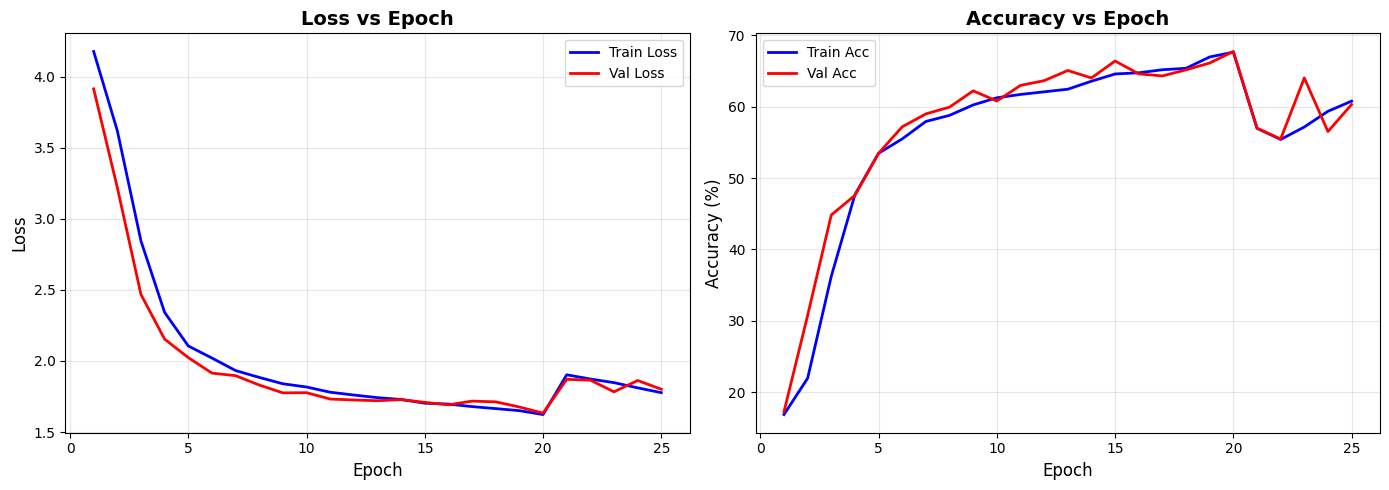

In [10]:
from utils import plot_graph

plot_graph(train_losses, val_losses, train_accs, val_accs, num_epochs=25)

Test the model.

In [16]:
from utils import test_model

results, test_accuracy, test_loss = test_model(
    model=model,
    train_df=train_df,
    test_df=test_df,
    dataset_dir=dataset_dir
)

Testing: 100%|██████████| 1061/1061 [02:15<00:00,  7.83it/s]


Test Accuracy: 61.07% (648/1061)


Visualize the result from test dataset.

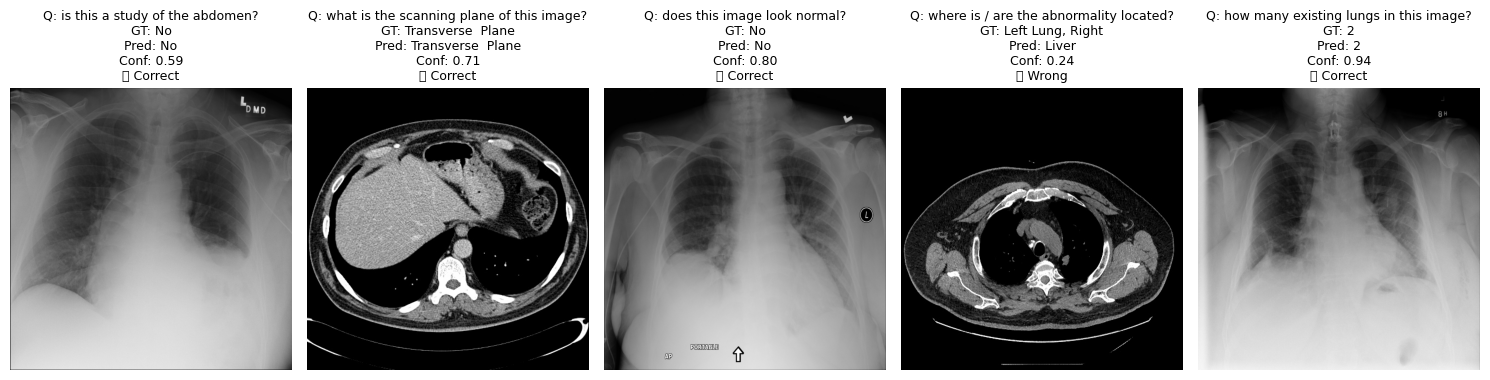

In [17]:
from utils import visualize_samples
import warnings
warnings.filterwarnings('ignore')

visualize_samples(results, working_dir, num_samples=5)